In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
filename = '/content/gdrive/My Drive/Projects/Bengali Text Classification/fastText_Bangla_content_full.sav'
loaded_model = joblib.load(filename)

In [0]:
loaded_model.corpus_total_words

11628655

In [0]:
loaded_model.vector_size

32

In [0]:
loaded_model.window

5

In [0]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [0]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/gdrive/My Drive/Projects/Bengali Text Classification/Nirmala.ttf')
def Draw_TSNE(loaded_model, main_words):
  word_vectors = np.empty((0,32), dtype='f')
  word_labels = []
  for word in main_words:
    word_labels.append(word)
    word_vectors = np.append(word_vectors, np.array([loaded_model[word]]), axis = 0)
    similar_words = loaded_model.similar_by_word(word)
    for sim_word in similar_words:
      word_labels.append(sim_word[0])
      word_vectors = np.append(word_vectors, np.array([loaded_model[sim_word[0]]]), axis = 0)
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(word_vectors)
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  fig, ax = plt.subplots(figsize=(20,10))
  plt.xticks(fontsize=11,weight='bold')
  plt.yticks(fontsize=11,weight='bold')
  ax.tick_params(axis="y",direction="in", labelsize=11, width = 2)
  ax.tick_params(axis="x",direction="in", labelsize=11, width = 2)
  plt.setp(ax.spines.values(), linewidth=2)
  ax.scatter(x_coords, y_coords)
  for label, x, y in zip(word_labels, x_coords, y_coords):
          ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontproperties=prop, fontsize = 12, fontweight = "bold")

  plt.savefig('/content/gdrive/My Drive/Projects/Bengali Text Classification/Images/TSNE.png')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


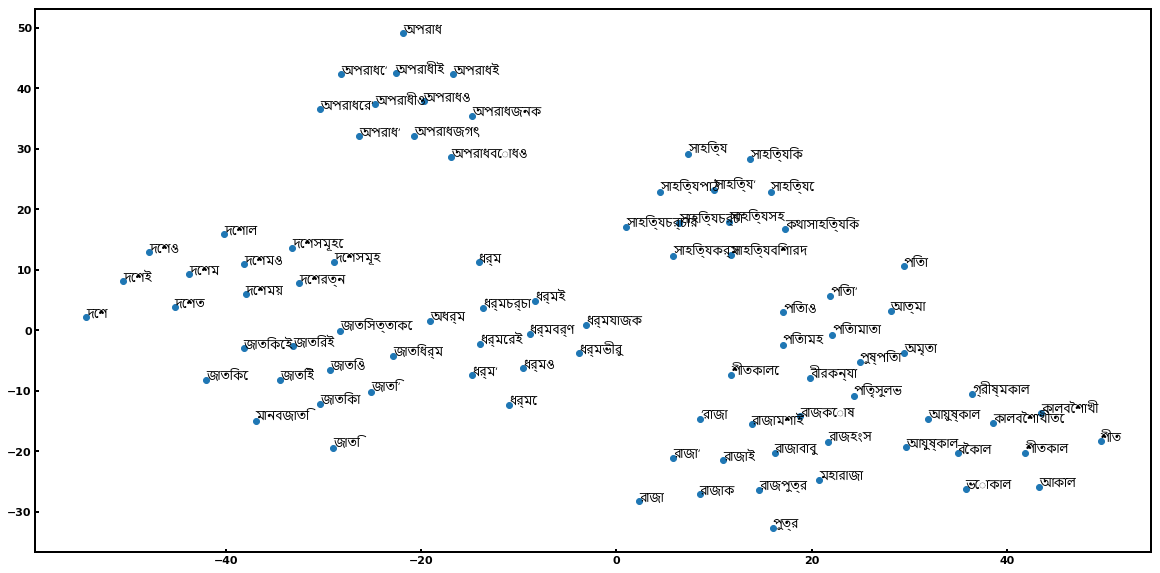

In [0]:
Draw_TSNE(loaded_model, ['সাহিত্য', 'শীতকাল', 'দেশ', 'পিতা', 'অপরাধ', 'জাতি', 'ধর্ম', 'রাজা'])